![](Zillow.jpg)

# Zillow Clustering Project
## Natasha Rivers
### June 28, 2021

<hr style="border:2px solid black"> </hr>

### Imports

In [1]:
import acquire
import prepare
import explore

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, TweedieRegressor, LassoLars

import warnings
warnings.filterwarnings("ignore")

<hr style="border:2px solid black"> </hr>

## Acquire

In [2]:
def get_connection(db_name):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [3]:
#my query is as follows:
def get_zillow():
    '''
    This function reads in the Zillow data from the Codeup db
    with all tables joined
    returns: a pandas DataFrame 
    '''
    
    zc_query = '''
    select prop.parcelid
        , pred.logerror
        , bathroomcnt
        , bedroomcnt
        , calculatedfinishedsquarefeet
        , fips
        , latitude
        , longitude
        , lotsizesquarefeet
        , regionidcity
        , regionidcounty
        , regionidzip
        , yearbuilt
        , structuretaxvaluedollarcnt
        , taxvaluedollarcnt
        , landtaxvaluedollarcnt
        , taxamount
    from properties_2017 prop
    inner join predictions_2017 pred on prop.parcelid = pred.parcelid
    where propertylandusetypeid = 261;
    '''

    return pd.read_sql(zc_query, get_connection('zillow'))

In [4]:
def get_zillow_file():
    '''
    This function reads in the zillow csv if it is available
    if not, one is created and read in as a pandas dataframe
    using the SQL query and connection functions above
    '''
    if os.path.isfile('zillow.csv'):
        df = pd.read_csv('zillow.csv', index_col=0)
    
    else:
        df = get_zillow()
        df.to_csv('zillow.csv')
    
    return df

In [5]:
#function from acquire.py 
zillow = acquire.get_zillow_file()

In [6]:
zillow.head()

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
0,14297519,0.025595,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,53571.0,1286.0,96978.0,1998.0,485713.0,1023282.0,537569.0,11013.72
1,17052889,0.055619,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,2061.0,97099.0,1967.0,88000.0,464000.0,376000.0,5672.48
2,14186244,0.005383,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,1286.0,97078.0,1962.0,85289.0,564778.0,479489.0,6488.30
3,12177905,-0.103410,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,3101.0,96330.0,1970.0,108918.0,145143.0,36225.0,1777.51
4,12095076,-0.001011,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,47019.0,3101.0,96293.0,1950.0,276684.0,773303.0,496619.0,9516.26


In [7]:
zillow.dtypes

parcelid                          int64
logerror                        float64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fips                            float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
landtaxvaluedollarcnt           float64
taxamount                       float64
dtype: object

In [8]:
#52442 entries,17 columns several nulls, incorrect dtypes
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52442 entries, 0 to 52441
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52442 non-null  int64  
 1   logerror                      52442 non-null  float64
 2   bathroomcnt                   52442 non-null  float64
 3   bedroomcnt                    52442 non-null  float64
 4   calculatedfinishedsquarefeet  52360 non-null  float64
 5   fips                          52442 non-null  float64
 6   latitude                      52442 non-null  float64
 7   longitude                     52442 non-null  float64
 8   lotsizesquarefeet             52073 non-null  float64
 9   regionidcity                  51405 non-null  float64
 10  regionidcounty                52442 non-null  float64
 11  regionidzip                   52416 non-null  float64
 12  yearbuilt                     52326 non-null  float64
 13  s

In [9]:
zillow.shape

(52442, 17)

## Takeaways from Acquire:
- based somewhat on personal interpretation, different "propertylandusetypeid" may be used. 
    - ended up settling on "261" (single-family residential)
- creating a function to save get_zillow into a csv will drastically reduce time to import
- 52,442 entries
- 17 different columns
    - appear to have some nulls (further explore this in prepare)
    - all numeric datatypes (float64 & int64)

<hr style="border:2px solid black"> </hr>

## Prepare

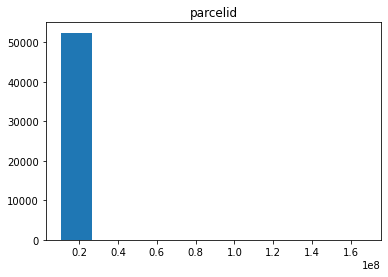

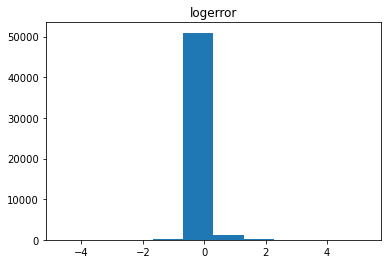

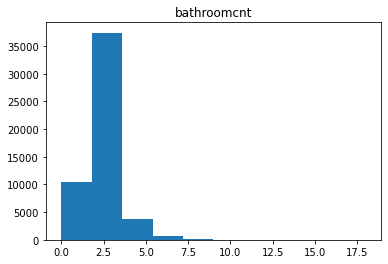

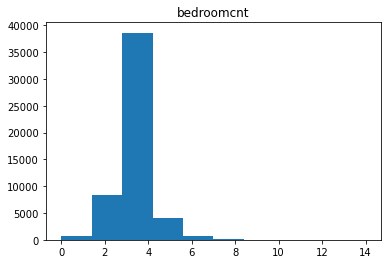

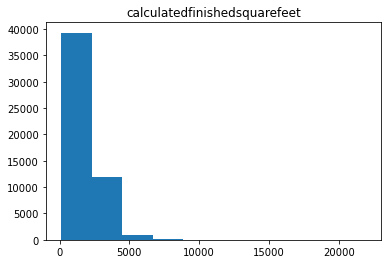

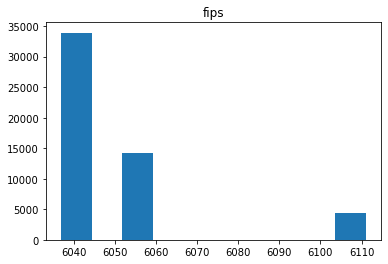

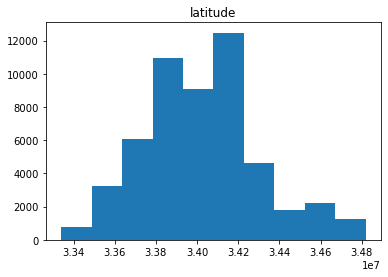

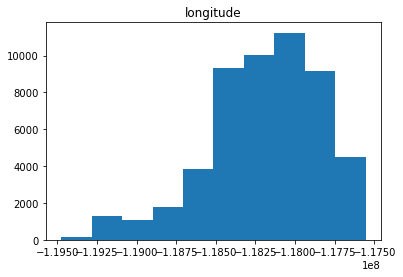

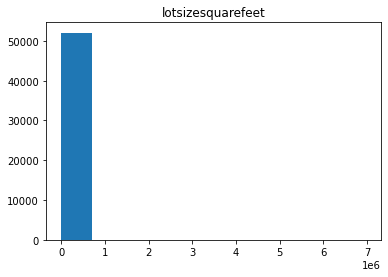

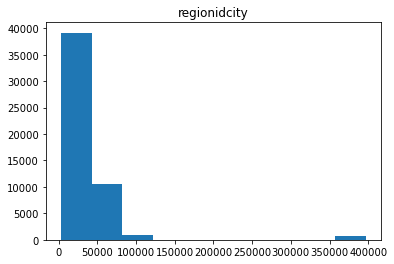

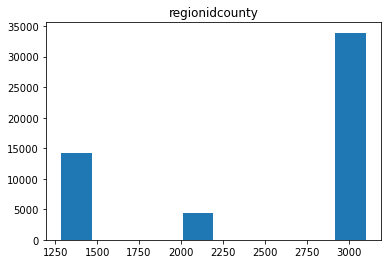

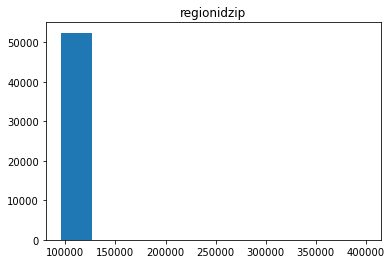

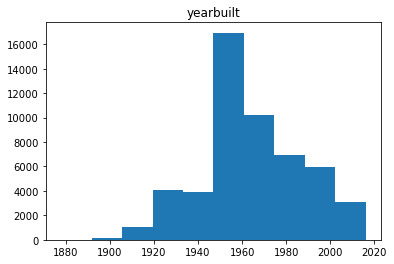

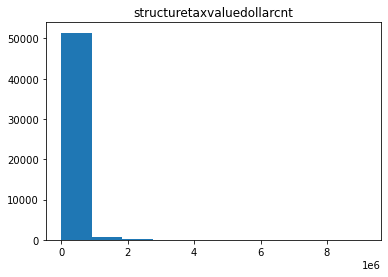

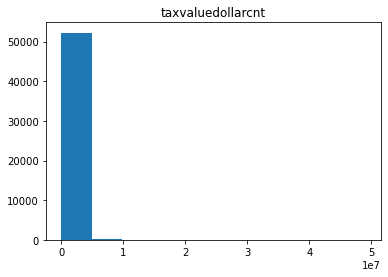

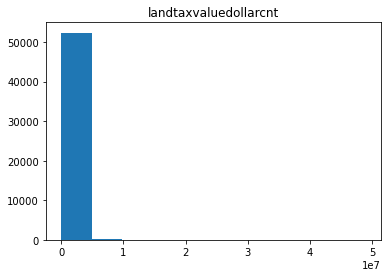

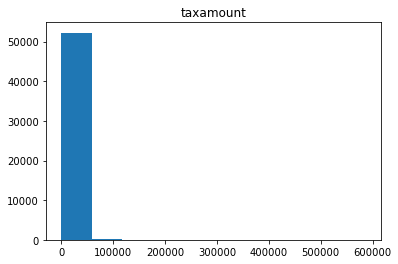

In [10]:
#visualize distributions 
#check for outliers
for col in zillow.columns:
    plt.hist(zillow[col])
    plt.title(col)
    plt.show()

<AxesSubplot:xlabel='bedroomcnt'>

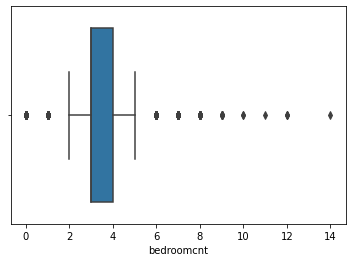

In [11]:
#specifically visualize outliers in bedroom
sns.boxplot(zillow.bedroomcnt)

In [12]:
#look at null values
zillow.isnull().sum()

parcelid                           0
logerror                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet      82
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                369
regionidcity                    1037
regionidcounty                     0
regionidzip                       26
yearbuilt                        116
structuretaxvaluedollarcnt        84
taxvaluedollarcnt                  1
landtaxvaluedollarcnt              1
taxamount                          4
dtype: int64

In [13]:
def final_prep_zillow(df):
    '''
    This function takes in the zillow df acquired by get_zillow_file,
    then the function removed outliers from bedrooms, bathrooms, value_assessed, and total_sqft
    Returns a cleaned zillow df.
    '''

    #replace blank spaces and special characters
    df = df.replace(r'^\s*$', np.nan, regex=True)

    #drop using threshold
    #df = handle_missing_values(df, prop_required_columns = 0.50, prop_required_row=0.75)

    #impute finished square feet and lot using mean
    df.calculatedfinishedsquarefeet=df.calculatedfinishedsquarefeet.fillna(df.calculatedfinishedsquarefeet.mean())
    df.lotsizesquarefeet=df.lotsizesquarefeet.fillna(df.lotsizesquarefeet.mean())

    #drop null values
    df = df.dropna()

    #new column with county names for fips
    df['county'] = df.fips.apply(lambda x: 'orange' if x == 6059.0 else 'los_angeles' if x == 6037.0 else 'ventura')

    #change datatypes
    df.bedroomcnt = df.bedroomcnt.astype(int)
    df.calculatedfinishedsquarefeet 
    df.calculatedfinishedsquarefeet.astype(int)
    df.fips = df.fips.astype(int)
    df.latitude = df.latitude.astype(int)
    df.longitude = df.longitude.astype(int)
    df.lotsizesquarefeet = df.lotsizesquarefeet.astype(int)
    df.regionidcity = df.regionidcity.astype(int)
    df.regionidcounty = df.regionidcounty.astype(int)
    df.regionidzip = df.regionidzip.astype(int)
    df.yearbuilt = df.yearbuilt.astype(int)
    df.structuretaxvaluedollarcnt = df.structuretaxvaluedollarcnt.astype(int)
    df.taxvaluedollarcnt = df.taxvaluedollarcnt.astype(int)
    df.landtaxvaluedollarcnt = df.landtaxvaluedollarcnt.astype(int)
    df.taxamount = df.taxamount.astype(int)

    #change column names to be more legible
    df = df.rename(columns={"calculatedfinishedsquarefeet": "total_sqft", "bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", "taxvaluedollarcnt": "value_assessed", "taxamount": "tax_amount", "yearbuilt": "year_built", "fips": "county_code"})

    #remove outliers for bedrooms
    q1_bed = df['bedrooms'].quantile(0.25)
    q3_bed = df['bedrooms'].quantile(0.75)
    iqr_bed = q3_bed - q1_bed
    lowerbound_bed = q1_bed - (1.5 * iqr_bed)
    upperbound_bed = q3_bed + (1.5 * iqr_bed)
    df= df[df.bedrooms > lowerbound_bed]
    df= df[df.bedrooms < upperbound_bed]

    #remove outliers for bathrooms
    q1_bath = df['bathrooms'].quantile(0.25)
    q3_bath = df['bathrooms'].quantile(0.75)
    iqr_bath = q3_bath - q1_bath
    lowerbound_bath = q1_bath - (1.5 * iqr_bath)
    upperbound_bath = q3_bath + (1.5 * iqr_bath)
    df= df[df.bathrooms > lowerbound_bath]
    df= df[df.bathrooms < upperbound_bath]

    #remove outliers for value assessed
    q1_tax = df['value_assessed'].quantile(0.25)
    q3_tax = df['value_assessed'].quantile(0.75)
    iqr_tax = q3_tax- q1_tax
    lowerbound_tax = q1_tax - (1.5 * iqr_tax)
    upperbound_tax = q3_tax + (1.5 * iqr_tax)
    df= df[df.value_assessed > lowerbound_tax]
    df= df[df.value_assessed < upperbound_tax]

    #remove outliers for total sqft
    q1_sqft = df['total_sqft'].quantile(0.25)
    q3_sqft = df['total_sqft'].quantile(0.75)
    iqr_sqft = q3_sqft - q1_sqft
    lowerbound_sqft = q1_sqft - (1.5 * iqr_sqft)
    upperbound_sqft = q3_sqft + (1.5 * iqr_sqft)
    df= df[df.total_sqft > lowerbound_sqft]
    df= df[df.total_sqft < upperbound_sqft]

    #drop duplicates
    df.drop_duplicates(inplace=True)
    
    return df

In [14]:
#function from prepare.py that changes column names, changes dtypes, 
#imputes values, drop nulls and outliers, creates new column with county name

zillow = prepare.final_prep_zillow(zillow)

In [15]:
#as you can see.. column names have been changed
zillow.head()

,parcelid,logerror,bathrooms,bedrooms,total_sqft,county_code,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,year_built,structuretaxvaluedollarcnt,value_assessed,landtaxvaluedollarcnt,tax_amount,county
0,14297519,0.025595,3.5,4,3100.0,6059,33634931,-117869207,4506,53571,1286,96978,1998,485713,1023282,537569,11013,orange
1,17052889,0.055619,1.0,2,1465.0,6111,34449266,-119281531,12647,13091,2061,97099,1967,88000,464000,376000,5672,ventura
2,14186244,0.005383,2.0,3,1243.0,6059,33886168,-117823170,8432,21412,1286,97078,1962,85289,564778,479489,6488,orange
3,12177905,-0.103410,3.0,4,2376.0,6037,34245180,-118240722,13038,396551,3101,96330,1970,108918,145143,36225,1777,los_angeles
4,12095076,-0.001011,3.0,4,2962.0,6037,34145202,-118179824,63000,47019,3101,96293,1950,276684,773303,496619,9516,los_angeles


In [16]:
#prepare.py also changed dtypes
zillow.dtypes

parcelid                        int64
logerror                      float64
bathrooms                     float64
bedrooms                        int64
total_sqft                    float64
county_code                     int64
latitude                        int64
longitude                       int64
lotsizesquarefeet               int64
regionidcity                    int64
regionidcounty                  int64
regionidzip                     int64
year_built                      int64
structuretaxvaluedollarcnt      int64
value_assessed                  int64
landtaxvaluedollarcnt           int64
tax_amount                      int64
county                         object
dtype: object

In [17]:
#prepare.py imputed values with mean and dropped others
zillow.isnull().sum()

parcelid                      0
logerror                      0
bathrooms                     0
bedrooms                      0
total_sqft                    0
county_code                   0
latitude                      0
longitude                     0
lotsizesquarefeet             0
regionidcity                  0
regionidcounty                0
regionidzip                   0
year_built                    0
structuretaxvaluedollarcnt    0
value_assessed                0
landtaxvaluedollarcnt         0
tax_amount                    0
county                        0
dtype: int64

In [18]:
#new shape after dropping outliers and nulls that were not imputed
zillow.shape

(44416, 18)

<AxesSubplot:xlabel='bedrooms'>

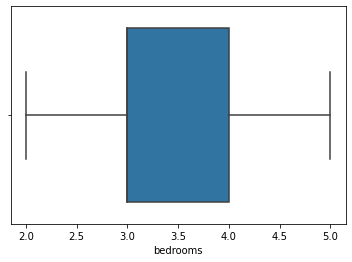

In [19]:
#visual that outliers were dropped 
sns.boxplot(zillow.bedrooms)

In [20]:
#take a look at our target
zillow.logerror.describe()

count    44416.000000
mean         0.016695
std          0.166244
min         -4.655420
25%         -0.024794
50%          0.005799
75%          0.037135
max          3.394544
Name: logerror, dtype: float64

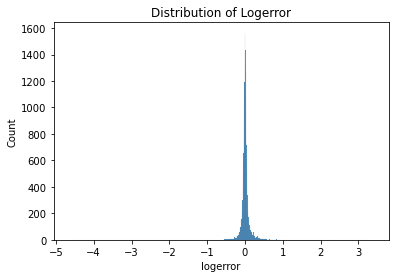

In [21]:
#taxvalue with outliers removed
sns.histplot(data=zillow.logerror)
plt.title('Distribution of Logerror')
plt.show()

In [22]:
#train validate test split
#split data using zillow_split function from prepare.py
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.zillow_split(zillow, 'logerror')

train -> (24872, 18)
validate -> (10660, 18)
test -> (8884, 18)


## Takeaways from Prepare 
- several columns were renamed in order to make them more legible
- duplicates were dropped on parcelid
- null values were imputed by mean for lotsizesquarefeet and total_sqft
- outliers were dropped from bedrooms, bathrooms, total_sqft and value_assessed columns
- created column titled "county" that uses county_code to name column
- final dataframe contains 44416 entries with 18 columns 

<hr style="border:2px solid black"> </hr>

## Explore

In [23]:
def summarize(df):
    '''
    this function will take in a single argument (a pandas df) 
    output various statistics on that df, including:
    #.head()
    #.info()
    #.describe()
    #.value_counts()
    #nulls 
    '''
    #print head
    print('=================================================')
    print('Dataframe head: ')
    print(df.head(3))
    
    #print info
    print('=================================================')
    print('Dataframe info: ')
    print(df.info())
    
    #print descriptive stats
    print('=================================================')
    print('DataFrame Description')
    print(df.describe())
    num_cols = df.select_dtypes(exclude='O').columns.to_list()
    cat_cols = df.select_dtypes(include='O').columns.to_list()
    
    #print value counts
    print('=================================================')
    print('Dataframe value counts: ')
    for col in df. columns:
        if col in cat_cols:
            print(df[col].value_counts())
        else:
            print(df[col].value_counts(bins=10, sort = False))
    
    #print nulls by column
    print('=================================================')
    print('nulls in dataframe by column: ')
    print(nulls_by_col(df))
    
    #print nulls by row
    print('=================================================')
    print('nulls in dataframe by row: ')
    print(nulls_by_row(df))
    print('=================================================')

In [24]:
#function from explore.py
summary = explore.summarize(zillow)

Dataframe head: 
   parcelid  logerror  bathrooms  bedrooms  total_sqft  county_code  latitude  \
0  14297519  0.025595        3.5         4      3100.0         6059  33634931   
1  17052889  0.055619        1.0         2      1465.0         6111  34449266   
2  14186244  0.005383        2.0         3      1243.0         6059  33886168   

   longitude  lotsizesquarefeet  regionidcity  regionidcounty  regionidzip  \
0 -117869207               4506         53571            1286        96978   
1 -119281531              12647         13091            2061        97099   
2 -117823170               8432         21412            1286        97078   

   year_built  structuretaxvaluedollarcnt  value_assessed  \
0        1998                      485713         1023282   
1        1967                       88000          464000   
2        1962                       85289          564778   

   landtaxvaluedollarcnt  tax_amount   county  
0                 537569       11013   orange  
1   

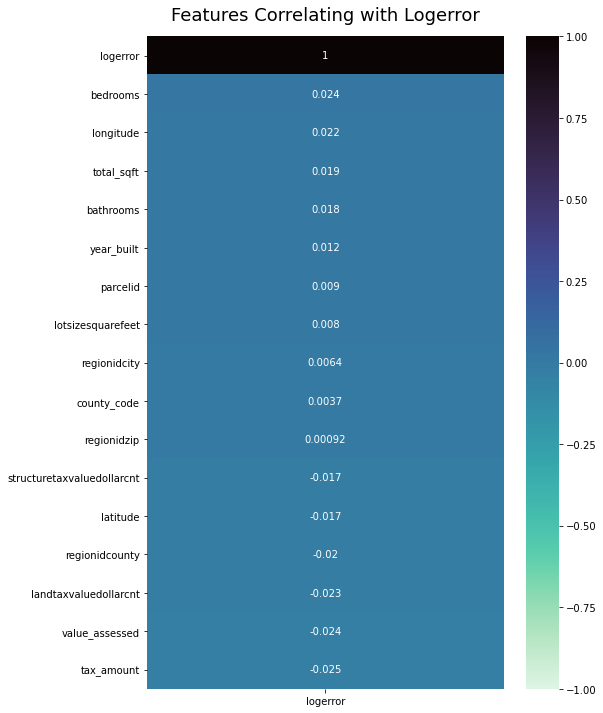

In [25]:
#see what correlates most with logerror
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(zillow.corr()[['logerror']].sort_values(by='logerror', ascending=False), vmin=-1, vmax=1, annot=True, cmap='mako_r')
heatmap.set_title('Features Correlating with Logerror', fontdict={'fontsize':18}, pad=16);

In [26]:
zillow.columns

Index(['parcelid', 'logerror', 'bathrooms', 'bedrooms', 'total_sqft',
       'county_code', 'latitude', 'longitude', 'lotsizesquarefeet',
       'regionidcity', 'regionidcounty', 'regionidzip', 'year_built',
       'structuretaxvaluedollarcnt', 'value_assessed', 'landtaxvaluedollarcnt',
       'tax_amount', 'county'],
      dtype='object')

In [27]:
numeric_cols = ['bathrooms', 'bedrooms', 'total_sqft',
       'county_code', 'latitude', 'longitude', 'lotsizesquarefeet',
       'regionidcity', 'regionidcounty', 'regionidzip', 'year_built',
       'structuretaxvaluedollarcnt', 'value_assessed', 'landtaxvaluedollarcnt',
       'tax_amount']

In [28]:
#use minmaxscaler function from prepare.py
X_train_scaled, X_validate_scaled, X_test_scaled = prepare.min_max_scaler(X_train, X_validate, X_test, numeric_cols)

In [29]:
X_train_scaled

,parcelid,bathrooms,bedrooms,total_sqft,county_code,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,year_built,structuretaxvaluedollarcnt,value_assessed,landtaxvaluedollarcnt,tax_amount,county
25510,17269042,0.166667,0.333333,0.294191,1.000000,0.563584,0.273817,0.000970,0.078325,0.426997,0.001215,0.637037,0.054903,0.051959,0.017552,0.020725,ventura
26165,11603467,1.000000,0.666667,0.804185,0.000000,0.476353,0.567466,0.001067,0.022785,1.000000,0.000109,0.548148,0.155708,0.161306,0.060190,0.081759,los_angeles
50434,14273600,0.666667,0.666667,0.688320,0.297297,0.209659,0.803600,0.000828,0.087876,0.000000,0.003217,0.711111,0.280250,0.324052,0.143187,0.146154,orange
25096,11091967,0.333333,1.000000,0.649906,0.000000,0.608227,0.489559,0.001277,0.022785,1.000000,0.001225,0.600000,0.220313,0.387540,0.258739,0.179118,los_angeles
18136,14365934,0.666667,0.666667,0.812305,0.297297,0.209073,0.940239,0.001042,0.073497,0.000000,0.003227,0.718519,0.266216,0.353392,0.186114,0.136264,orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27680,12300016,0.333333,0.333333,0.333854,0.000000,0.408351,0.672117,0.000828,0.112630,1.000000,0.000471,0.496296,0.095359,0.199951,0.148818,0.099873,los_angeles
1791,12818093,0.333333,0.000000,0.308557,0.000000,0.458026,0.787949,0.001118,0.107135,1.000000,0.001669,0.533333,0.171348,0.365826,0.272458,0.163387,los_angeles
9000,11294244,0.333333,0.333333,0.278576,0.000000,0.914909,0.713193,0.001222,0.005198,1.000000,0.004399,0.570370,0.062484,0.055756,0.015904,0.047097,los_angeles
904,11280776,0.333333,0.666667,0.494379,0.000000,0.910690,0.683750,0.000958,0.005198,1.000000,0.004402,0.800000,0.178215,0.186550,0.070619,0.108457,los_angeles


### Feature Engineering

In [30]:
def rfe(X, y, n):
    lm = LinearRegression()
    rfe = RFE(lm, n)
    rfe.fit(X, y)
    
    n_features = X.columns[rfe.support_]
    
    return n_features

In [31]:
#RFE function from prepare.py
n_features= prepare.rfe(X_train_scaled, y_train, 3)

ValueError: could not convert string to float: 'ventura'

In [ ]:
def select_kbest(X,y,k): 
    f_selector = SelectKBest(f_regression, k)
    f_selector.fit(X, y)
    k_features = X.columns[f_selector.get_support()]

    return k_features

In [ ]:
#SelectKBest function from prepare.py
k_features = prepare.select_kbest(X_train_scaled, y_train, 3)